In [109]:
import pandas as pd
crops  = pd.read_csv('/content/crops.csv')
rainfall =pd.read_csv('/content/rainfall.csv',encoding='utf-8')

In [110]:
crops.head()

,State/UT,2021-22 - Food Grains,2021-22 - Commercial/Cash Crops,2022-23 - Food Grains,2022-23 - Commercial/Cash Crops,2023-24 - Food Grains,2023-24 - Commercial/Cash Crops
0,Andhra Pradesh,4010.00,602.00,3680.00,745.00,3328.00,450.00
1,Arunachal Pradesh,235.40,2.15,237.07,2.16,NaN,0.00
2,Assam,2554.52,94.95,2529.00,91.00,2579.00,89.00
3,Bihar,6443.77,274.84,6258.71,270.42,6518.18,268.64
4,Chhattisgarh,4760.92,39.31,4698.14,47.36,4727.87,47.42


In [111]:
# rename the state
crops.rename(columns={'State/UT' : 'State'}, inplace =True)

# change the df (columnc to row)
crops_l = crops.melt(
    id_vars=['State'],
    var_name='Category',
    value_name='Area'
)

#extract the year and croptype from the category
crops_l[['Year' , 'CropType']] = crops_l['Category'].str.extract(r'(\d{4}-\d{2}) - (.*)')

#clean columns are
crops_l = crops_l [['State','Year','CropType','Area']]

crops_l.head()

,State,Year,CropType,Area
0,Andhra Pradesh,2021-22,Food Grains,4010.00
1,Arunachal Pradesh,2021-22,Food Grains,235.40
2,Assam,2021-22,Food Grains,2554.52
3,Bihar,2021-22,Food Grains,6443.77
4,Chhattisgarh,2021-22,Food Grains,4760.92


In [112]:
rainfall.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [113]:
rainfall = rainfall[['SUBDIVISION','YEAR','ANNUAL']]

# rename the columns
rainfall.rename(columns={'SUBDIVISION':'State','YEAR':'Year','ANNUAL':'Rainfall'},inplace=True)

rainfall.head()

,State,Year,Rainfall
0,Andaman & Nicobar Islands,1901,3373.2
1,Andaman & Nicobar Islands,1902,3520.7
2,Andaman & Nicobar Islands,1903,2957.4
3,Andaman & Nicobar Islands,1904,3079.6
4,Andaman & Nicobar Islands,1905,2566.7


In [114]:
# take avg rainfall per state
rainfall_recent = rainfall.groupby('State')['Rainfall'].mean().reset_index()
rainfall_recent.head()


,State,Rainfall
0,Andaman & Nicobar Islands,2926.373585
1,Arunachal Pradesh,3403.959140
2,Assam & Meghalaya,2579.133333
3,Bihar,1196.563248
4,Chhattisgarh,1369.136752


Example question: Compare the average annual rainfall between Gujarat Region and Saurashtra & Kutch over the last 10 years,
and display the total crop area in Gujarat for 2021–24.

In [124]:
# ---- Step 1: Filter rainfall data ----
states = ['Gujarat Region', 'Saurashtra & Kutch']
#last 10 year range
rainfall_recent = rainfall[rainfall['Year'].astype(int) >= 2008]
rainfall_filtered = rainfall_recent[rainfall_recent['State'].isin(states)]
print(rainfall_filtered)

                   State  Year  Rainfall
2424      Gujarat Region  2008     911.1
2425      Gujarat Region  2009     641.6
2426      Gujarat Region  2010    1088.7
2427      Gujarat Region  2011     890.5
2428      Gujarat Region  2012     714.0
2429      Gujarat Region  2013    1118.6
2430      Gujarat Region  2014     705.7
2431      Gujarat Region  2015     622.9
2432      Gujarat Region  2016     764.9
2433      Gujarat Region  2017    1024.4
2541  Saurashtra & Kutch  2008     607.9
2542  Saurashtra & Kutch  2009     596.9
2543  Saurashtra & Kutch  2010    1119.9
2544  Saurashtra & Kutch  2011     742.5
2545  Saurashtra & Kutch  2012     323.8
2546  Saurashtra & Kutch  2013     681.8
2547  Saurashtra & Kutch  2014     383.9
2548  Saurashtra & Kutch  2015     441.7
2549  Saurashtra & Kutch  2016     482.9
2550  Saurashtra & Kutch  2017     652.1


In [134]:
rainfall_avg = rainfall_filtered.groupby('State')['Rainfall'].mean().reset_index()
rainfall_avg.rename(columns={'Rainfall':'Avg_Rainfall_2008_2017'}, inplace=True)

print("🌧️ Average Annual Rainfall (2008–2017):")
print(rainfall_avg)
print("\n-----------------------------------\n")



🌧️ Average Annual Rainfall (2008–2017):
                State  Avg_Rainfall_2008_2017
0      Gujarat Region                  848.24
1  Saurashtra & Kutch                  603.34

-----------------------------------



In [137]:
# ---- Step 2: Gujarat crop data ----
gujarat_crop = crops_l[crops_l['State'].str.contains('Gujarat', case= False)]
gujarat_summary = gujarat_crop.groupby('Year')['Area'].sum().reset_index()
gujarat_summary.rename(columns={'Area': 'Total_Crop_Area'} , inplace=True)


print("🌾 Gujarat Total Crop Area (2021–24):")
print(gujarat_summary)
print("\n-----------------------------------\n")

🌾 Gujarat Total Crop Area (2021–24):
      Year  Total_Crop_Area
0  2021-22          7101.70
1  2022-23          6941.32
2  2023-24          7212.69

-----------------------------------



In [138]:
# ---- Step 3: Combined Interpretation ----
print("📊 Insight:")
print("Between 2008–2017, the Gujarat Region received about {:.1f} mm of rainfall, while Saurashtra & Kutch received about {:.1f} mm."
      .format(rainfall_avg.loc[rainfall_avg['State'] == 'Gujarat Region', 'Avg_Rainfall_2008_2017'].values[0],
              rainfall_avg.loc[rainfall_avg['State'] == 'Saurashtra & Kutch', 'Avg_Rainfall_2008_2017'].values[0]))
print("Despite lower rainfall, Gujarat maintained a steady total crop area between 2021–24, indicating strong irrigation or water management practices.")


📊 Insight:
Between 2008–2017, the Gujarat Region received about 848.2 mm of rainfall, while Saurashtra & Kutch received about 603.3 mm.
Despite lower rainfall, Gujarat maintained a steady total crop area between 2021–24, indicating strong irrigation or water management practices.


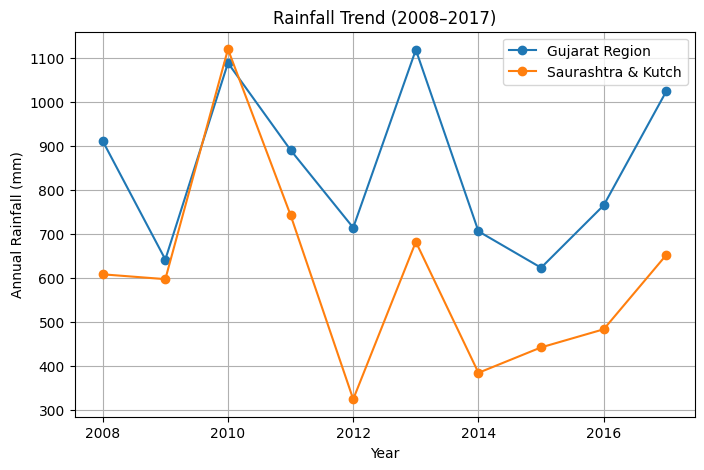

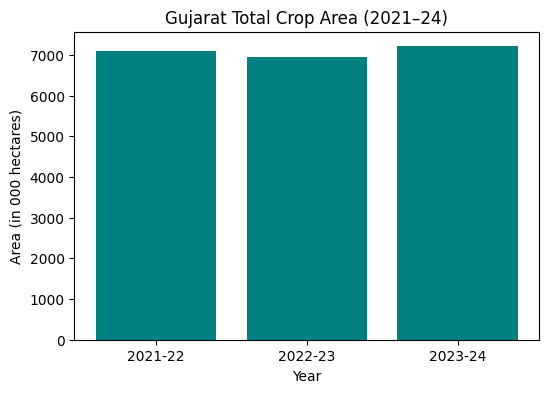

In [139]:
# ---- Step 4: Optional Visuals ----
# Rainfall Comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for state in states:
    subset = rainfall_filtered[rainfall_filtered['State'] == state ]
    plt.plot(subset['Year'], subset['Rainfall'], marker='o', label=state)

plt.title('Rainfall Trend (2008–2017)')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Crop Area Trend
plt.figure(figsize=(6,4))
plt.bar(gujarat_summary['Year'], gujarat_summary['Total_Crop_Area'], color='teal')
plt.title('Gujarat Total Crop Area (2021–24)')
plt.xlabel('Year')
plt.ylabel('Area (in 000 hectares)')
plt.show()